For the final project I am looking a Wake County Housing price since 2000. All the houses I am looking for are built after the 2000s and the goal is to predict housing price for houses built after the 2000s.

Here I imported all of the necessary packages for the whole project.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import norm
import math
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score

Here I read in and stored the dataset into a data frame called df.

In [2]:
df = pd.read_csv('WakeCountyHousing.csv')

Looking at the dataset at first glance.

In [3]:
df.info() #info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

In [4]:
df

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308287,482492,0.19,440000,3/1/2021,March 2021,2021,2020,2020,2814,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308288,482495,0.19,464000,3/17/2021,March 2021,2021,2020,2020,3129,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0
308289,482496,0.19,431000,3/30/2021,March 2021,2021,2020,2020,2801,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308290,483428,4.42,100000,3/8/2021,March 2021,2021,1901,1901,833,One Story,Conventional,1 Bath,E,Raleigh,27614.0


Here I am dropping all null values.

In [5]:
df = df.dropna()
df

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308287,482492,0.19,440000,3/1/2021,March 2021,2021,2020,2020,2814,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308288,482495,0.19,464000,3/17/2021,March 2021,2021,2020,2020,3129,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0
308289,482496,0.19,431000,3/30/2021,March 2021,2021,2020,2020,2801,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308290,483428,4.42,100000,3/8/2021,March 2021,2021,1901,1901,833,One Story,Conventional,1 Bath,E,Raleigh,27614.0


In [6]:
df.isna().sum() #checking to see if all null values are dropped

Real_Estate_Id        0
Deeded_Acreage        0
Total_Sale_Price      0
Total_Sale_Date       0
Month_Year_of_Sale    0
Year_of_Sale          0
Year_Built            0
Year_Remodeled        0
Heated_Area           0
Num_Stories           0
Design_Style          0
Bath                  0
Utilities             0
Physical_City         0
Physical_Zip          0
dtype: int64

Here I am dropping duplicates.

In [7]:
df = df.drop_duplicates()

In [8]:
df[df.duplicated()] #checking to see if all duplicates are dropped

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip


Selecting all houses built after 2000

In [9]:
df = df.loc[df['Year_Built'] >= 2000]

In [10]:
df

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
28,64,0.31,247000,10/25/2002,October 2002,2002,2008,2008,2514,Other,Conventional,2½ Bath,ALL,Raleigh,27605.0
48,100,0.31,725000,9/27/2013,September 2013,2013,2004,2019,4255,Other,Conventional,3½ Bath,ALL,Raleigh,27608.0
88,180,0.39,490000,12/17/2014,December 2014,2014,2014,2014,3209,Other,Conventional,3½ Bath,ALL,Raleigh,27607.0
102,208,0.16,108000,3/1/2016,March 2016,2016,2006,2006,1352,Other,Conventional,2 Bath,ALL,Raleigh,27601.0
103,210,0.11,250000,4/20/2021,April 2021,2021,2020,2020,1527,Other,Conventional,2½ Bath,ALL,Raleigh,27610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308285,482490,0.19,485000,10/26/2020,October 2020,2020,2020,2020,3144,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0
308286,482491,0.19,489500,12/2/2020,December 2020,2020,2020,2020,3064,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0
308287,482492,0.19,440000,3/1/2021,March 2021,2021,2020,2020,2814,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0
308288,482495,0.19,464000,3/17/2021,March 2021,2021,2020,2020,3129,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0


Here I am calculating the age of the house

In [11]:
df['House_Age'] = df.apply(lambda row: row.Year_of_Sale - row.Year_Built, axis=1)

In [12]:
df['Remodeled_House_Age'] = df['Year_of_Sale'] - df['Year_Remodeled']

After cleaning the dataset we are left with 150588 rows and 17 columns.

In [13]:
df

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,House_Age,Remodeled_House_Age
28,64,0.31,247000,10/25/2002,October 2002,2002,2008,2008,2514,Other,Conventional,2½ Bath,ALL,Raleigh,27605.0,-6,-6
48,100,0.31,725000,9/27/2013,September 2013,2013,2004,2019,4255,Other,Conventional,3½ Bath,ALL,Raleigh,27608.0,9,-6
88,180,0.39,490000,12/17/2014,December 2014,2014,2014,2014,3209,Other,Conventional,3½ Bath,ALL,Raleigh,27607.0,0,0
102,208,0.16,108000,3/1/2016,March 2016,2016,2006,2006,1352,Other,Conventional,2 Bath,ALL,Raleigh,27601.0,10,10
103,210,0.11,250000,4/20/2021,April 2021,2021,2020,2020,1527,Other,Conventional,2½ Bath,ALL,Raleigh,27610.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308285,482490,0.19,485000,10/26/2020,October 2020,2020,2020,2020,3144,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0,0,0
308286,482491,0.19,489500,12/2/2020,December 2020,2020,2020,2020,3064,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0,0,0
308287,482492,0.19,440000,3/1/2021,March 2021,2021,2020,2020,2814,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0,1,1
308288,482495,0.19,464000,3/17/2021,March 2021,2021,2020,2020,3129,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150582 entries, 28 to 308289
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Real_Estate_Id       150582 non-null  int64  
 1   Deeded_Acreage       150582 non-null  float64
 2   Total_Sale_Price     150582 non-null  int64  
 3   Total_Sale_Date      150582 non-null  object 
 4   Month_Year_of_Sale   150582 non-null  object 
 5   Year_of_Sale         150582 non-null  int64  
 6   Year_Built           150582 non-null  int64  
 7   Year_Remodeled       150582 non-null  int64  
 8   Heated_Area          150582 non-null  int64  
 9   Num_Stories          150582 non-null  object 
 10  Design_Style         150582 non-null  object 
 11  Bath                 150582 non-null  object 
 12  Utilities            150582 non-null  object 
 13  Physical_City        150582 non-null  object 
 14  Physical_Zip         150582 non-null  float64
 15  House_Age       

Here I am plotting a bar graph to visually show at what age most houses are sold at.

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


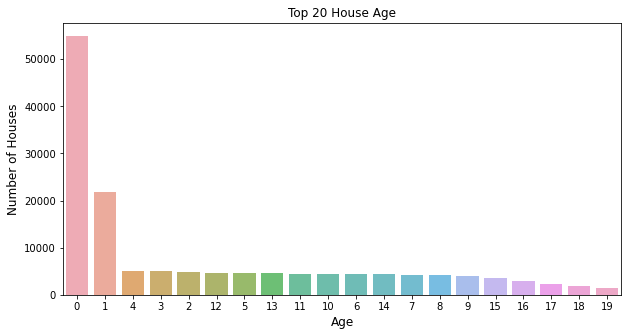

In [15]:
# Plotting a bar graph of the number of houses, for the first 20 ages listed
# in the column 'house age'
age_count = df['House_Age'].value_counts()
age_count = age_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(age_count.index, age_count.values, alpha=0.8, order=age_count.index)
plt.title('Top 20 House Age')
plt.ylabel('Number of Houses', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

Here I triple checked the age of the house and it is confirmed that the age is correct.

In [16]:
df['House_Age'].value_counts()

 0     54935
 1     21748
 4      5073
 3      5010
 2      4876
       ...  
-49        4
-45        4
-43        4
-42        4
-47        1
Name: House_Age, Length: 71, dtype: int64

In [17]:
df['House_Age'].sort_values().head(10)

27328   -49
1281    -49
28601   -49
17470   -49
26382   -48
41499   -48
13087   -48
31711   -48
13031   -48
3821    -47
Name: House_Age, dtype: int64

In [18]:
df.iloc[3821,:]

Real_Estate_Id                197937
Deeded_Acreage                  0.69
Total_Sale_Price              164500
Total_Sale_Date             5/4/2006
Month_Year_of_Sale          May 2006
Year_of_Sale                    2006
Year_Built                      2005
Year_Remodeled                  2005
Heated_Area                     1711
Num_Stories                One Story
Design_Style            Conventional
Bath                          2 Bath
Utilities                          E
Physical_City          Fuquay Varina
Physical_Zip                   27526
House_Age                          1
Remodeled_House_Age                1
Name: 117422, dtype: object

In [19]:
df.iloc[41499,:]

Real_Estate_Id                305513
Deeded_Acreage                  0.18
Total_Sale_Price              115000
Total_Sale_Date             2/6/2014
Month_Year_of_Sale     February 2014
Year_of_Sale                    2014
Year_Built                      2003
Year_Remodeled                  2003
Heated_Area                     1385
Num_Stories                One Story
Design_Style            Conventional
Bath                          2 Bath
Utilities                        ALL
Physical_City                Raleigh
Physical_Zip                   27610
House_Age                         11
Remodeled_House_Age               11
Name: 196735, dtype: object

In [20]:
df.iloc[26382,:]

Real_Estate_Id               286083
Deeded_Acreage                 0.11
Total_Sale_Price             394000
Total_Sale_Date           8/18/2005
Month_Year_of_Sale      August 2005
Year_of_Sale                   2005
Year_Built                     2005
Year_Remodeled                 2005
Heated_Area                    3174
Num_Stories                   Other
Design_Style           Conventional
Bath                        3½ Bath
Utilities                       ALL
Physical_City                  Cary
Physical_Zip                  27519
House_Age                         0
Remodeled_House_Age               0
Name: 181433, dtype: object

Here I plot a bar graph of the top 20 years with the most houses built.

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


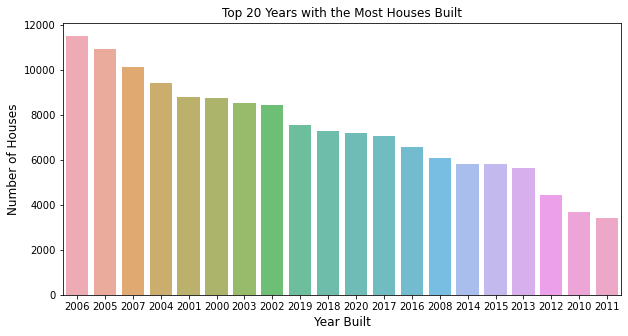

In [21]:
yearbuilt_count = df['Year_Built'].value_counts()
yearbuilt_count = yearbuilt_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(yearbuilt_count.index, yearbuilt_count.values, alpha=0.8, order=yearbuilt_count.index)
plt.title('Top 20 Years with the Most Houses Built')
plt.ylabel('Number of Houses', fontsize=12)
plt.xlabel('Year Built', fontsize=12)
plt.show()

In [22]:
df.describe() #looked at the describe data

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Physical_Zip,House_Age,Remodeled_House_Age
count,150582.000000,150582.000000,1.505820e+05,150582.000000,150582.000000,150582.000000,150582.000000,150582.000000,150582.000000,150582.000000
mean,350395.874945,0.288204,3.334129e+05,2013.789158,2009.157403,2009.201379,2562.086717,27568.078602,4.631755,4.587779
std,79323.130094,1.001266,1.937667e+05,5.979711,6.347107,6.351812,1026.832722,40.680093,6.086396,6.101403
min,64.000000,0.000000,0.000000e+00,1968.000000,2000.000000,2000.000000,264.000000,27501.000000,-49.000000,-49.000000
25%,300536.250000,0.100000,2.060000e+05,2009.000000,2004.000000,2004.000000,1808.000000,27526.000000,0.000000,0.000000
50%,346589.500000,0.180000,2.950000e+05,2016.000000,2007.000000,2007.000000,2402.000000,27587.000000,1.000000,1.000000
75%,418996.750000,0.290000,4.090000e+05,2019.000000,2015.000000,2015.000000,3088.000000,27610.000000,9.000000,9.000000
max,482496.000000,307.910000,5.500000e+06,2021.000000,2022.000000,2022.000000,18789.000000,27713.000000,21.000000,21.000000


In [23]:
df.columns #columns in the df

Index(['Real_Estate_Id', 'Deeded_Acreage', 'Total_Sale_Price',
       'Total_Sale_Date', 'Month_Year_of_Sale', 'Year_of_Sale', 'Year_Built',
       'Year_Remodeled', 'Heated_Area', 'Num_Stories', 'Design_Style', 'Bath',
       'Utilities', 'Physical_City', 'Physical_Zip', 'House_Age',
       'Remodeled_House_Age'],
      dtype='object')

Here I looked at the correlation value of each column.

In [24]:
df.corr()['Total_Sale_Price'].sort_values(ascending=False)

Total_Sale_Price       1.000000
Heated_Area            0.792203
Year_Remodeled         0.288850
Year_Built             0.284227
Year_of_Sale           0.271494
Deeded_Acreage         0.123641
Real_Estate_Id         0.116424
House_Age             -0.029667
Remodeled_House_Age   -0.034626
Physical_Zip          -0.124616
Name: Total_Sale_Price, dtype: float64

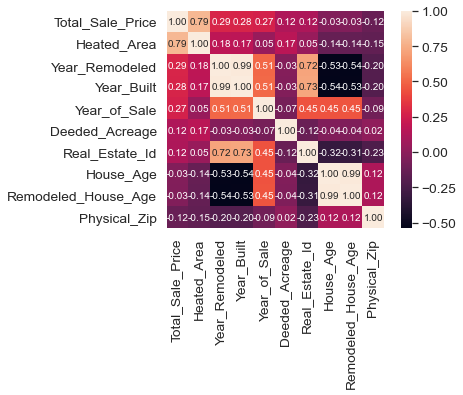

In [25]:
corrmat = df.corr()
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Total_Sale_Price')['Total_Sale_Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Here I created a scatter plot of the house pricing by the heated area of the house. 

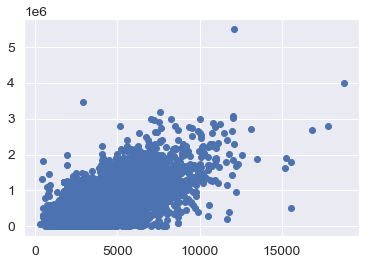

In [26]:
X = df['Heated_Area']
Y = df['Total_Sale_Price']
plt.scatter(X,Y)

In [27]:
def calc_slope(xs,ys):
    
    # Use the slope formula and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

149.4913832063961

In [28]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X,Y)
m, c

(149.4913832063961, -49596.993733227486)

In [29]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

Here I plotted the regression line into the graph.

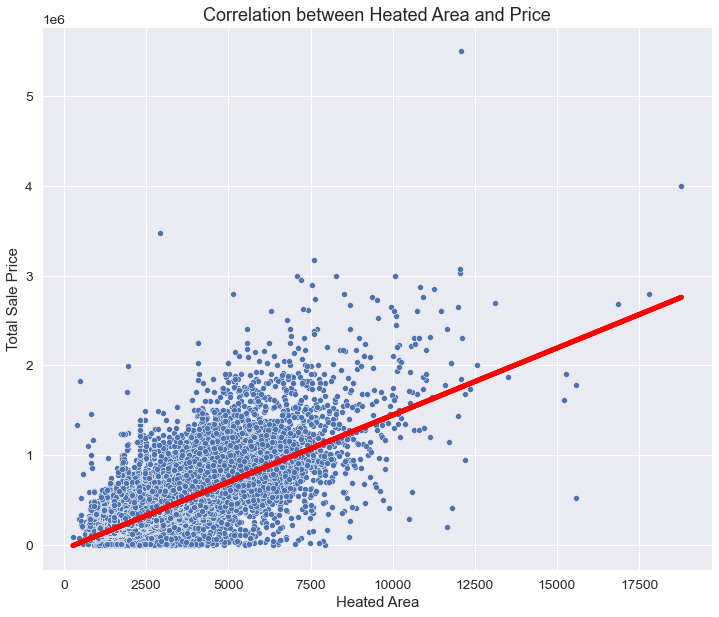

In [30]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['Heated_Area'], y=df['Total_Sale_Price'], ax=ax)
plt.plot(X, regression_line, lw=5, color='red')
ax.set_title('Correlation between Heated Area and Price', fontsize=18)
ax.set_ylabel('Total Sale Price', fontsize=15)
ax.set_xlabel('Heated Area', fontsize=15);

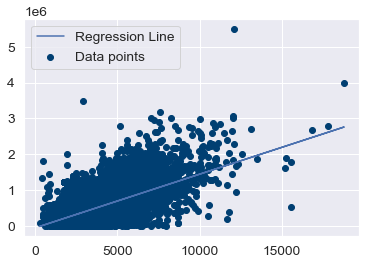

In [31]:
# Plot data and regression line
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()

In [32]:
print("Skewness: %f" % df['Total_Sale_Price'].skew())
print("Kurtosis: %f" % df['Total_Sale_Price'].kurt())

Skewness: 2.785452
Kurtosis: 19.913314


In [33]:
price_scaled = StandardScaler().fit_transform(df['Total_Sale_Price'][:,np.newaxis]);

<ipython-input-33-95c04aeb65eb>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  price_scaled = StandardScaler().fit_transform(df['Total_Sale_Price'][:,np.newaxis]);


/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


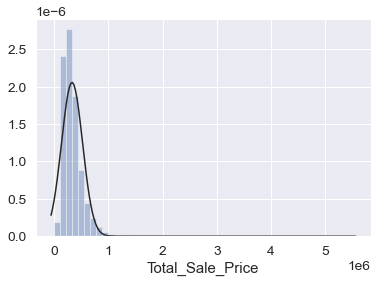

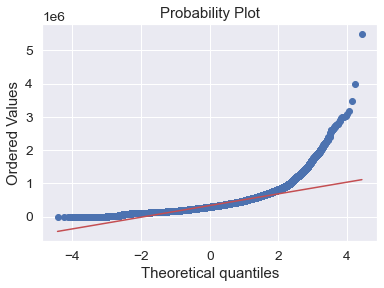

In [34]:
sns.distplot(df['Total_Sale_Price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Total_Sale_Price'], plot=plt)

In [35]:
df['Total_Sale_Price'] = np.log(df['Total_Sale_Price'])

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
df

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,House_Age,Remodeled_House_Age
28,64,0.31,12.417144,10/25/2002,October 2002,2002,2008,2008,2514,Other,Conventional,2½ Bath,ALL,Raleigh,27605.0,-6,-6
48,100,0.31,13.493927,9/27/2013,September 2013,2013,2004,2019,4255,Other,Conventional,3½ Bath,ALL,Raleigh,27608.0,9,-6
88,180,0.39,13.102161,12/17/2014,December 2014,2014,2014,2014,3209,Other,Conventional,3½ Bath,ALL,Raleigh,27607.0,0,0
102,208,0.16,11.589887,3/1/2016,March 2016,2016,2006,2006,1352,Other,Conventional,2 Bath,ALL,Raleigh,27601.0,10,10
103,210,0.11,12.429216,4/20/2021,April 2021,2021,2020,2020,1527,Other,Conventional,2½ Bath,ALL,Raleigh,27610.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308285,482490,0.19,13.091904,10/26/2020,October 2020,2020,2020,2020,3144,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0,0,0
308286,482491,0.19,13.101140,12/2/2020,December 2020,2020,2020,2020,3064,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0,0,0
308287,482492,0.19,12.994530,3/1/2021,March 2021,2021,2020,2020,2814,Other,Conventional,3 Bath,ALL,Holly Springs,27540.0,1,1
308288,482495,0.19,13.047640,3/17/2021,March 2021,2021,2020,2020,3129,One Story,Conventional,3½ Bath,ALL,Holly Springs,27540.0,1,1


/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


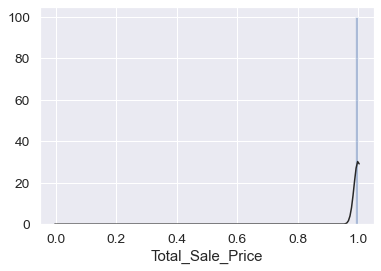

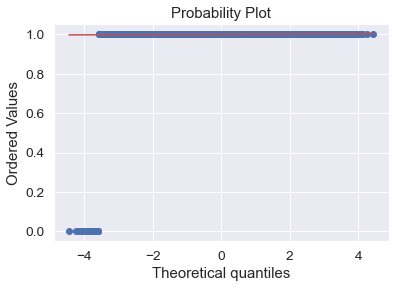

In [37]:
#transformed histogram and normal probability plot
sns.distplot(np.isfinite(df['Total_Sale_Price']), fit=norm, bins=100, kde=False);
fig = plt.figure()
res = stats.probplot(np.isfinite(df['Total_Sale_Price']), plot=plt)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150582 entries, 28 to 308289
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Real_Estate_Id       150582 non-null  int64  
 1   Deeded_Acreage       150582 non-null  float64
 2   Total_Sale_Price     150582 non-null  float64
 3   Total_Sale_Date      150582 non-null  object 
 4   Month_Year_of_Sale   150582 non-null  object 
 5   Year_of_Sale         150582 non-null  int64  
 6   Year_Built           150582 non-null  int64  
 7   Year_Remodeled       150582 non-null  int64  
 8   Heated_Area          150582 non-null  int64  
 9   Num_Stories          150582 non-null  object 
 10  Design_Style         150582 non-null  object 
 11  Bath                 150582 non-null  object 
 12  Utilities            150582 non-null  object 
 13  Physical_City        150582 non-null  object 
 14  Physical_Zip         150582 non-null  float64
 15  House_Age       

Made a second Dataframe to do linregtest with.

In [39]:
slimdf=df.drop(['Deeded_Acreage','Physical_Zip','House_Age','Remodeled_House_Age','Total_Sale_Date','Month_Year_of_Sale','Num_Stories','Design_Style','Bath','Utilities','Physical_City' ], axis=1)

In [40]:
slimdf['Total_Sale_Price_log']=np.log(slimdf['Total_Sale_Price'])
slimdf

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Real_Estate_Id,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Total_Sale_Price_log
28,64,12.417144,2002,2008,2008,2514,2.519078
48,100,13.493927,2013,2004,2019,4255,2.602240
88,180,13.102161,2014,2014,2014,3209,2.572777
102,208,11.589887,2016,2006,2006,1352,2.450133
103,210,12.429216,2021,2020,2020,1527,2.520050
...,...,...,...,...,...,...,...
308285,482490,13.091904,2020,2020,2020,3144,2.571994
308286,482491,13.101140,2020,2020,2020,3064,2.572699
308287,482492,12.994530,2021,2020,2020,2814,2.564529
308288,482495,13.047640,2021,2020,2020,3129,2.568607


In [41]:
slimdf=slimdf.dropna()

In [42]:
slimdf.isna().sum()

Real_Estate_Id          0
Total_Sale_Price        0
Year_of_Sale            0
Year_Built              0
Year_Remodeled          0
Heated_Area             0
Total_Sale_Price_log    0
dtype: int64

In [43]:
slimdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150556 entries, 28 to 308289
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Real_Estate_Id        150556 non-null  int64  
 1   Total_Sale_Price      150556 non-null  float64
 2   Year_of_Sale          150556 non-null  int64  
 3   Year_Built            150556 non-null  int64  
 4   Year_Remodeled        150556 non-null  int64  
 5   Heated_Area           150556 non-null  int64  
 6   Total_Sale_Price_log  150556 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 9.2 MB


In [56]:
slimdf.describe()

,Real_Estate_Id,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Total_Sale_Price_log
count,150556.000000,150556.000000,150556.000000,150556.000000,150556.000000,150556.000000,150556.000000
mean,350434.165214,12.573503,2013.793492,2009.157377,2009.201360,2562.093221,2.530481
std,79269.756468,0.570943,5.970330,6.346841,6.351547,1026.838672,0.048231
min,64.000000,5.521461,1968.000000,2000.000000,2000.000000,264.000000,1.708642
25%,300557.750000,12.235631,2009.000000,2004.000000,2004.000000,1808.000000,2.504352
50%,346606.500000,12.594731,2016.000000,2007.000000,2007.000000,2402.000000,2.533279
75%,419003.250000,12.921470,2019.000000,2015.000000,2015.000000,3088.000000,2.558890
max,482496.000000,15.520259,2021.000000,2022.000000,2022.000000,18789.000000,2.742146


In [57]:
slimdf.corr()

,Real_Estate_Id,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Total_Sale_Price_log
Real_Estate_Id,1.000000,0.238149,0.445342,0.727546,0.720030,0.046650,0.238274
Total_Sale_Price,0.238149,1.000000,0.360130,0.329392,0.333210,0.702182,0.993527
Year_of_Sale,0.445342,0.360130,1.000000,0.514822,0.512811,0.045641,0.353412
Year_Built,0.727546,0.329392,0.514822,1.000000,0.993103,0.173554,0.313777
Year_Remodeled,0.720030,0.333210,0.512811,0.993103,1.000000,0.178239,0.317343
Heated_Area,0.046650,0.702182,0.045641,0.173554,0.178239,1.000000,0.657019
Total_Sale_Price_log,0.238274,0.993527,0.353412,0.313777,0.317343,0.657019,1.000000


In [58]:
slimdf.corr()['Total_Sale_Price'].sort_values(ascending=False)

Total_Sale_Price        1.000000
Total_Sale_Price_log    0.993527
Heated_Area             0.702182
Year_of_Sale            0.360130
Year_Remodeled          0.333210
Year_Built              0.329392
Real_Estate_Id          0.238149
Name: Total_Sale_Price, dtype: float64

In [44]:
X = slimdf['Heated_Area']
Y = slimdf['Total_Sale_Price_log']
calc_slope(X,Y)
m, c = best_fit(X,Y)
regression_line = reg_line(m,c,X)

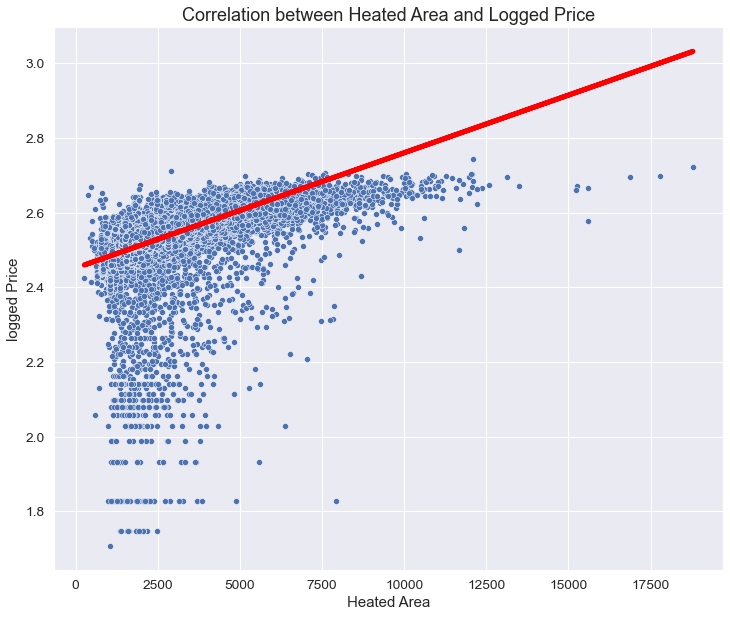

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['Heated_Area'], y=slimdf['Total_Sale_Price_log'], ax=ax)
plt.plot(X, regression_line, lw=5, color='red')
ax.set_title('Correlation between Heated Area and Logged Price', fontsize=18)
ax.set_ylabel('logged Price', fontsize=15)
ax.set_xlabel('Heated Area', fontsize=15);

In [46]:
#stasmodels
f = 'Total_Sale_Price ~ Heated_Area + Year_Remodeled'
model = ols(formula=f, data=df).fit()
model.summary()

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1666: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total_Sale_Price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                nan
Time:                        23:37:36   Log-Likelihood:                    nan
No. Observations:              150582   AIC:                               nan
Df Residuals:                  150579   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept             nan        nan        nan        nan         nan         nan
Heated_Area           nan        nan        nan        nan         nan         nan
Year_Remodeled        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#stasmodels
f = 'Total_Sale_Price ~ Heated_Area + Remodeled_House_Age'
model = ols(formula=f, data=df).fit()
model.summary()

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1666: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total_Sale_Price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                nan
Time:                        23:37:36   Log-Likelihood:                    nan
No. Observations:              150582   AIC:                               nan
Df Residuals:                  150579   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept                  nan        nan        nan        nan         nan         nan
Heated_Area                nan        nan        nan        nan         nan         nan
Remodeled_House_Age        inf        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     8.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
def linregtest(dataframe):
    X = dataframe.drop(['Total_Sale_Price','Total_Sale_Price_log'], axis=1)
    y = dataframe['Total_Sale_Price']
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_score = mean_squared_error(np.exp(y_train), np.exp(train_preds))
    test_score = mean_squared_error(np.exp(y_test), np.exp(test_preds))
    train_score_RSME = math.sqrt(train_score)
    test_score_RSME =math.sqrt(test_score)
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('RSME train:', math.sqrt(train_score))
    print('RSME test:', math.sqrt(test_score))
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_train, 10)
    errors['error'] = train_preds - y_train
    errors.groupby('bins').mean().plot(kind='bar', figsize=(15,6))
    plt.xticks(rotation=40);
    return list(zip(X.columns, model.coef_))

Train score: 258340457974.80377
Test score: 24684550927.84591
RSME train: 508272.03147016047
RSME test: 157113.17872109235


[('Real_Estate_Id', 5.253402904775231e-07),
 ('Year_of_Sale', 0.028082289538261848),
 ('Year_Built', -0.009826084104093535),
 ('Year_Remodeled', 0.010489102189626726),
 ('Heated_Area', 0.0003792746315935472)]

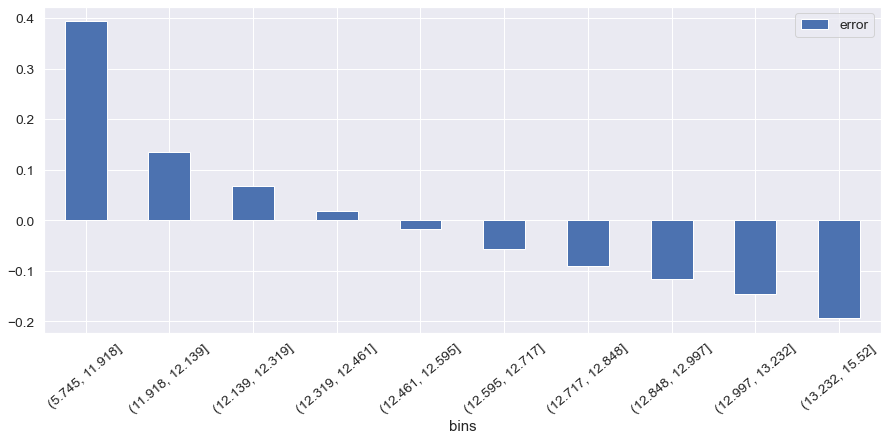

In [49]:
linregtest(slimdf)

One Hot Encoded Zip Codes

In [50]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(df[['Physical_Zip']])
dfohe = pd.DataFrame(ohe.transform(df[['Physical_Zip']]), columns = ohe.get_feature_names())
dfohe.columns = dfohe.columns.str.replace('x0','zip')
dfohe

,zip_27501.0,zip_27502.0,zip_27511.0,zip_27513.0,zip_27518.0,zip_27519.0,zip_27520.0,zip_27522.0,zip_27523.0,zip_27526.0,...,zip_27609.0,zip_27610.0,zip_27612.0,zip_27613.0,zip_27614.0,zip_27615.0,zip_27616.0,zip_27617.0,zip_27703.0,zip_27713.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Adding Zipcodes into the calculation

In [51]:
modeldfzip= pd.concat([slimdf, dfohe], axis=1)
modeldfzip

,Real_Estate_Id,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Total_Sale_Price_log,zip_27501.0,zip_27502.0,zip_27511.0,...,zip_27609.0,zip_27610.0,zip_27612.0,zip_27613.0,zip_27614.0,zip_27615.0,zip_27616.0,zip_27617.0,zip_27703.0,zip_27713.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308285,482490.0,13.091904,2020.0,2020.0,2020.0,3144.0,2.571994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308286,482491.0,13.101140,2020.0,2020.0,2020.0,3064.0,2.572699,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308287,482492.0,12.994530,2021.0,2020.0,2020.0,2814.0,2.564529,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308288,482495.0,13.047640,2021.0,2020.0,2020.0,3129.0,2.568607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
modeldfzip = originalmodeldfzip.dropna()

Train score: 305138962395.06714
Test score: 116524216511.4772
RSME train: 552393.847173434
RSME test: 341356.4361653039


[('Real_Estate_Id', -1.212390715570539e-07),
 ('Year_of_Sale', 0.07889853751183806),
 ('Year_Built', -0.029016554062852706),
 ('Year_Remodeled', 0.013094846822061206),
 ('Heated_Area', 0.0003049431494172028),
 ('zip_27501.0', 0.19181590693203626),
 ('zip_27502.0', 0.033068756287993946),
 ('zip_27511.0', -0.21509267584295175),
 ('zip_27513.0', 0.1231314206800237),
 ('zip_27518.0', 0.2380658698097191),
 ('zip_27519.0', 0.045099251056018065),
 ('zip_27520.0', -1.0699146074586885),
 ('zip_27522.0', 1.4854784069484595e-13),
 ('zip_27523.0', 0.11745899111326678),
 ('zip_27526.0', 0.004856443659601518),
 ('zip_27529.0', 0.07561655679639094),
 ('zip_27539.0', 0.0025942891931661372),
 ('zip_27540.0', 0.05333153138370493),
 ('zip_27545.0', -0.04234168049976049),
 ('zip_27560.0', 0.07010728790049889),
 ('zip_27562.0', 0.0027245242041138333),
 ('zip_27571.0', -0.0460487360665881),
 ('zip_27587.0', -0.02042297910229748),
 ('zip_27591.0', -0.06556334815692882),
 ('zip_27592.0', -0.12459193955869485)

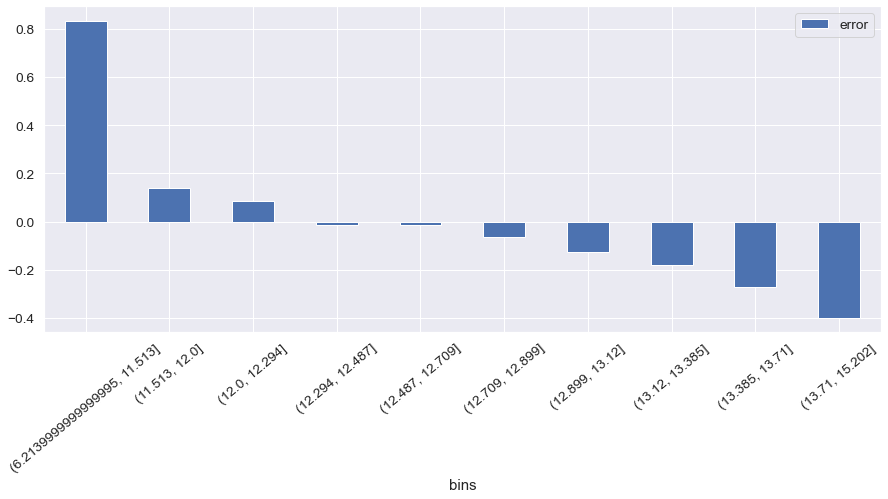

In [55]:
linregtest(modeldfzip)

Made another chart to see if dropping some lower correlation column will help make the RSME better.

In [59]:
finalcal=slimdf.drop(['Real_Estate_Id','Real_Estate_Id'], axis=1)

Train score: 258113256198.6041
Test score: 24884129941.586285
RSME train: 508048.4781973115
RSME test: 157747.04416117052


[('Year_of_Sale', 0.028720443473954225),
 ('Year_Built', -0.004249974906372042),
 ('Year_Remodeled', 0.009465493540595142),
 ('Heated_Area', 0.0003761357819502334)]

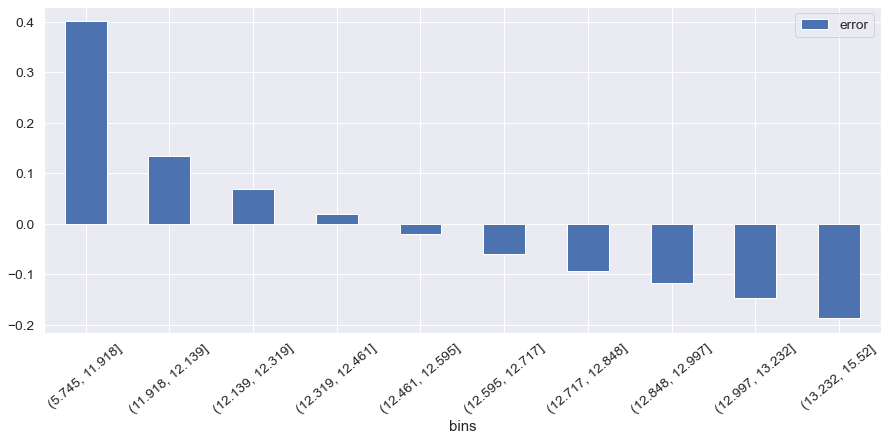

In [60]:
linregtest(finalcal)

After running my models, I were able to see a gradual improvement in the root mean squared errors(RMSE), which is equivalent to dollars off-target. The first model gave us a testing root mean squared error(RMSE) of $157,113.18. Then the second gave us $341,356.44 and lastly it gave us $157,747.04. These numbers show trial and error improvement between models. The second model was the most stable, but was still the highest off by RSME.

